# Abstract

In [20]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer, NewtonOptimizer, AdamOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Newton's Method

# Testing Newton Method Implementation
In order to test the correctness of the Newton's Method implementation, I will demonstrate for a sufficiently small learning rate `α`, Newton's Method coverges to the same result that regular gradient descent would achieve. 

In [15]:
import torch
def generate_classification_data(n_points = 300, noise = 0.5, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = generate_classification_data(noise = 0.5)

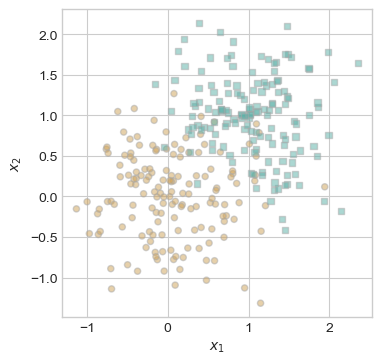

In [16]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_classification_data(X, y, ax)


In [30]:
# Logistic Regression model with gradient descent optimizer
LR_GD = LogisticRegression()
opt_GD = GradientDescentOptimizer(LR_GD)

#Logistic Regression model with Newton's Method optimizer 
LR_NM = LogisticRegression()
opt_NM = NewtonOptimizer(LR_NM)

num_iterations = 1000
for _ in range(num_iterations):
    opt_GD.step(X, y, 0.1, 0, False, 0)
    opt_NM.step(X, y, 1)
print(f"Gradient Descent Logistic Regression Loss: {LR_GD.loss(X,y)}\nNewton's Method Logistic Regression Loss: {LR_NM.loss(X,y)}\n")



Gradient Descent Logistic Regression Loss: 0.2044578492641449
Newton's Method Logistic Regression Loss: 0.19098138809204102



# Adam Optimization

In [ ]:
LR_Adam = LogisticRegression()
opt_Adam = AdamOptimizer(LR_Adam)

num_iterations = 1000
for _ in range(num_iterations):
    # Using the same dataset X and y as with newtons method
    opt_Adam.step(X, y, 0.01, 0.9, 0.999, 1e-8, 10)
print(f"Gradient Descent Logistic Regression Loss: {LR_Adam.loss(X,y)}")

Gradient Descent Logistic Regression Loss: 0.20271477103233337


# Comparing Adam Optimzation and Standard Minibatch Gradient Descent

In [42]:
import pandas as pd

num_iterations = 1000
step_size = [0.0001, 0.001, 0.01, 0.1, 1]

minibatch_GD_loss = []
adam_OPT_loss = []

for step in step_size: 
    LR_GD = LogisticRegression()
    opt_GD = GradientDescentOptimizer(LR_GD)

    LR_Adam = LogisticRegression()
    opt_Adam = AdamOptimizer(LR_Adam)

    for _ in range(num_iterations):
        # Using the same dataset X and y as with newtons method
        opt_Adam.step(X, y, step, 0.9, 0.999, 1e-8, 10)
        opt_GD.step(X, y, step, 0.9, True, 10)
    adam_OPT_loss.append(LR_Adam.loss(X, y).item())
    minibatch_GD_loss.append(LR_GD.loss(X, y).item())
# Make some type of table
#first convert to series
df = pd.DataFrame({
    "Minibatch GD Loss": minibatch_GD_loss,
    "Adam Optimizer Loss": adam_OPT_loss
}, index=step_size)

print(df)

        Minibatch GD Loss  Adam Optimizer Loss
0.0001           0.632115             0.639498
0.0010           0.652358             0.455142
0.0100           0.389342             0.204201
0.1000           0.204531             0.186826
1.0000           0.187661             0.189089


# Results
On average with the same batch size of 10, using the adam opitmizer converges faster than standard minibatch gradient descent when both optimizers have matching alpha values.

# Comparing Adam and Newton's Method Optimization

In [ ]:
import time

X, y = generate_classification_data(noise = 0.8)
LR_Adam = LogisticRegression()
opt_Adam = AdamOptimizer(LR_Adam)

LR_NM = LogisticRegression()
opt_NM = NewtonOptimizer(LR_NM)


LOSS_THRESHOLD = 0.2
MAX_ITER = 1000

start_adam = time.time()

for _ in range(MAX_ITER):
    opt_Adam.step(X, y, step, 0.9, 0.999, 1e-8, 10)
    loss = LR_Adam.loss(X, y).item()
    if loss < LOSS_THRESHOLD:
        break

end_adam = time.time()
adam_time = end_adam - start_adam

    
start_newton = time.time()

for _ in range(MAX_ITER):
    opt_NM.step(X, y, 0.9)
    loss = LR_NM.loss(X, y).item()
    if loss < LOSS_THRESHOLD:
        break

end_newton = time.time()
newton_time = end_newton - start_newton

print(f"Newton's Method Optimization converge time: {newton_time}\nAdam Optimization converge time: {adam_time}")


Newton's Method Optimization converge time: 0.04390406608581543
Adam Optimization converge time: 0.06467199325561523


# Results
Seems like Newton's Method converges faster than Adam Optimization on this dataset.

# Results
Here, we demonstrate that Logistic Regression using either Newton's Method or Gradient Descent optimization can converge to a similar value given enough iterations and a small enough learning rate `α`.